# Slide anterior para ser reproduzido

![imagem da questao](../../assets/Captura%20de%20Tela%202025-05-23%20às%2017.48.18.png)

![imagem da questao](../../assets/Captura%20de%20Tela%202025-05-23%20às%2017.41.51.png)

![imagem da questao](../../assets/Captura%20de%20Tela%202025-05-23%20às%2017.42.01.png)

![imagem da questao](../../assets/Captura%20de%20Tela%202025-05-23%20às%2017.42.16.png)

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import r2_score

# Reproduzir o Exemplo do Slide anterior

In [17]:
# Simular Peso do mouse X e Tamanho do mouse Y

X_peso = np.array([1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0])

y_tamanho = np.array([0.9, 1.2, 1.7, 2.0, 2.5, 2.8, 3.3, 3.6, 4.0, 4.4, 4.7])

# Equação da linha y = 0.1 + 0.78x 
intercepto = 0.1
coeficiente_angular = 0.78
y_previsto = intercepto + coeficiente_angular * X_peso

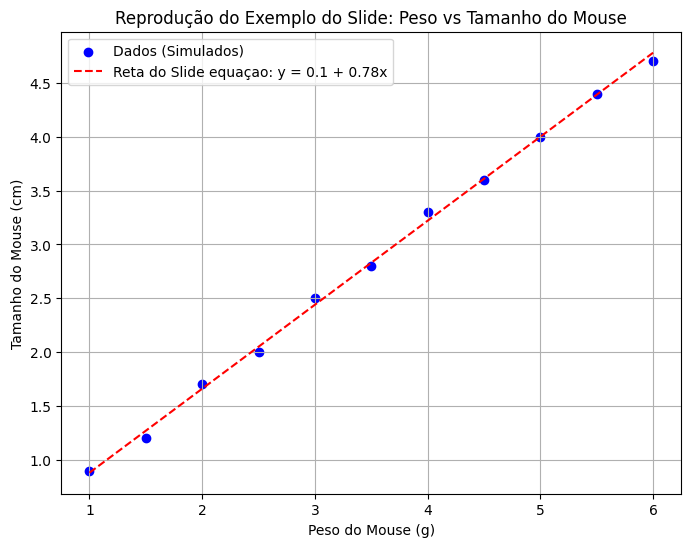

(Peso X): [1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6. ]
(Tamanho Y): [0.9 1.2 1.7 2.  2.5 2.8 3.3 3.6 4.  4.4 4.7]
--------------------------------------------------


In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(X_peso, y_tamanho, color='blue', label='Dados (Simulados)')
plt.plot(X_peso, y_previsto, color='red', linestyle='--', label=f'Reta do Slide equaçao: y = {intercepto} + {coeficiente_angular}x')
plt.title('Reprodução do Exemplo do Slide: Peso vs Tamanho do Mouse')
plt.xlabel('Peso do Mouse (g)')
plt.ylabel('Tamanho do Mouse (cm)')
plt.grid(True)
plt.legend()
plt.show()

print(f"(Peso X): {X_peso}")
print(f"(Tamanho Y): {y_tamanho}")
print("-" * 50)

# Aplicar Regressão Linear com Scikit-learn

In [23]:
# Redimensionar X para o formato que o scikit-learn espera (N, 1)
X_peso_reshaped = X_peso.reshape(-1, 1)

# Cria e treina o modelo de Regressão
model_sklearn = LinearRegression()
model_sklearn.fit(X_peso_reshaped, y_tamanho)

# Obtem os coeficientes
intercepto_sklearn = model_sklearn.intercept_
coeficiente_angular_sklearn = model_sklearn.coef_[0]

print(f"Intercepto (scikit-learn): {intercepto_sklearn:.4f}")
print(f"Coeficiente Angular (scikit-learn): {coeficiente_angular_sklearn:.4f}")

# Faz as previsões com o modelo
y_previsto_sklearn = model_sklearn.predict(X_peso_reshaped)

Intercepto (scikit-learn): 0.1100
Coeficiente Angular (scikit-learn): 0.7764


# Plotar os dados e a reta de regressão do scikit-learn

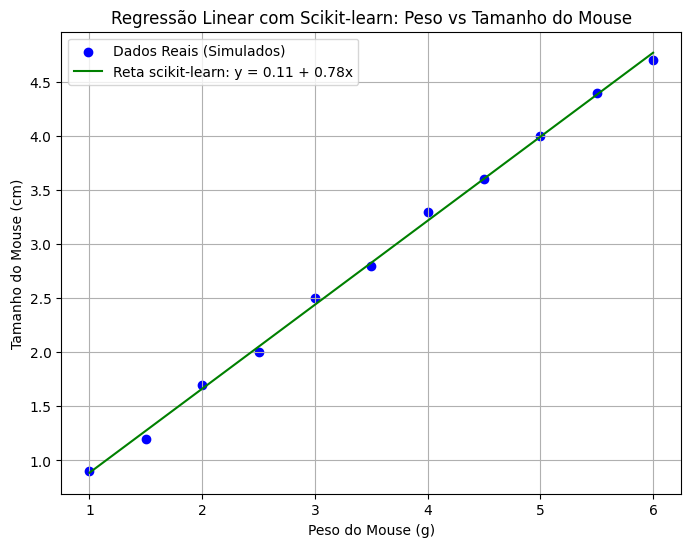

--------------------------------------------------


In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(X_peso, y_tamanho, color='blue', label='Dados Reais (Simulados)')
plt.plot(X_peso, y_previsto_sklearn, color='green', label=f'Reta scikit-learn: y = {intercepto_sklearn:.2f} + {coeficiente_angular_sklearn:.2f}x')
plt.title('Regressão Linear com Scikit-learn: Peso vs Tamanho do Mouse')
plt.xlabel('Peso do Mouse (g)')
plt.ylabel('Tamanho do Mouse (cm)')
plt.grid(True)
plt.legend()
plt.show()
print("-" * 50)

# Gerar as Estatísticas da Regressão Linear utilizando Statsmodels.api as sm

In [24]:
# Adicionar uma constante (intercepto) à variável independente para o Statsmodels
X_peso_sm = sm.add_constant(X_peso)

# Criar e ajustar o modelo OLS (Ordinary Least Squares)
model_sm = sm.OLS(y_tamanho, X_peso_sm)
results_sm = model_sm.fit()

# Imprimir o resumo das estatísticas
print(results_sm.summary())
print("-" * 50)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     5639.
Date:                Fri, 23 May 2025   Prob (F-statistic):           6.66e-14
Time:                        20:22:00   Log-Likelihood:                 17.558
No. Observations:                  11   AIC:                            -31.12
Df Residuals:                       9   BIC:                            -30.32
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1100      0.040      2.770      0.0

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=11 observations were given.
  return hypotest_fun_in(*args, **kwds)


# Apartir do b obtido, usar 6 Diferentes Coeficientes Angulares (a's) para plotar diferentes retas

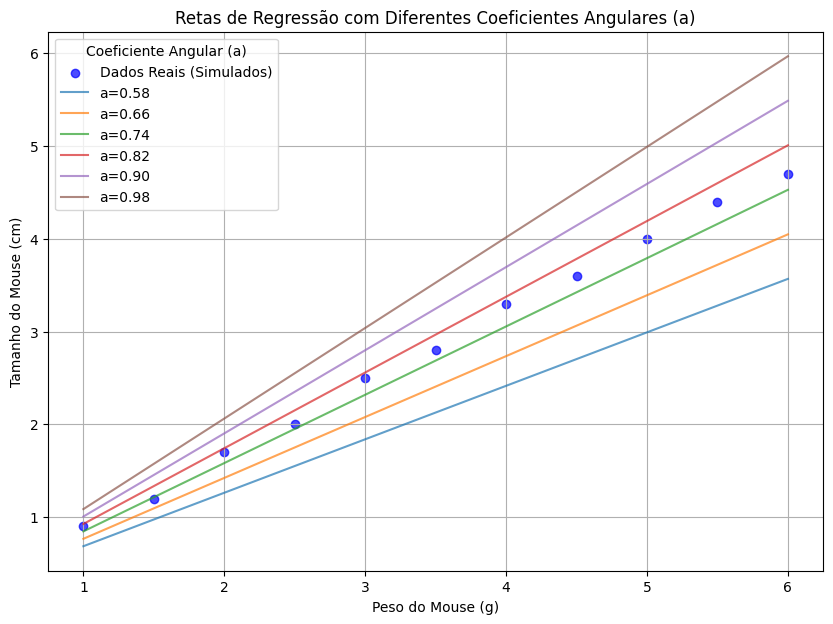

--------------------------------------------------


In [27]:
best_slope = coeficiente_angular_sklearn

# 6 diferentes "a's" (variando o coeficiente angular ao redor do valor ideal)
# Exemplo: 6 valores ao redor do melhor slope
slopes_to_test = np.linspace(best_slope - 0.2, best_slope + 0.2, 6) 

plt.figure(figsize=(10, 7))
plt.scatter(X_peso, y_tamanho, color='blue', label='Dados Reais (Simulados)', alpha=0.7)

for slope in slopes_to_test:
    y_pred_current_slope = intercepto_sklearn + slope * X_peso
    plt.plot(X_peso, y_pred_current_slope, linestyle='-', alpha=0.7, label=f'a={slope:.2f}')

plt.title('Retas de Regressão com Diferentes Coeficientes Angulares (a)')
plt.xlabel('Peso do Mouse (g)')
plt.ylabel('Tamanho do Mouse (cm)')
plt.grid(True)
plt.legend(title='Coeficiente Angular (a)')
plt.show()
print("-" * 50)

# Calcular o R-Squared para cada ‘a’ e compare com o melhor obtido pelo scikit-learn.

In [36]:
# Usar um range mais fino de coeficientes angulares para a curva
slopes_for_ssr_plot = np.linspace(best_slope - 0.5, best_slope + 0.5, 100)
ssr_values = []
r_squared_values = []

for slope in slopes_for_ssr_plot:
    y_pred = intercepto_sklearn + slope * X_peso
    residuals = y_tamanho - y_pred
    ssr = np.sum(residuals**2)
    ssr_values.append(ssr)

    # Calcular R-squared para cada 'a'
    ss_total = np.sum((y_tamanho - np.mean(y_tamanho))**2)
    ss_residual = ssr
    r2 = 1 - (ss_residual / ss_total)
    r_squared_values.append(r2)

In [40]:
# Encontrar o índice do melhor R-squared
best_r2_index = np.argmax(r_squared_values)
best_r2_slope = slopes_for_ssr_plot[best_r2_index]
best_r2_value = r_squared_values[best_r2_index]

print(f"R-Squared do modelo scikit-learn (melhor ajuste): {model_sklearn.score(X_peso_reshaped, y_tamanho):.4f}")
print(f"Melhor R-Squared encontrado na varredura (a={best_r2_slope:.4f}): {best_r2_value:.4f}")

R-Squared do modelo scikit-learn (melhor ajuste): 0.9984
Melhor R-Squared encontrado na varredura (a=0.7713): 0.9982


# Gerar o Gráfico de Soma dos Residuals Squared - Sum of Squared Residuals

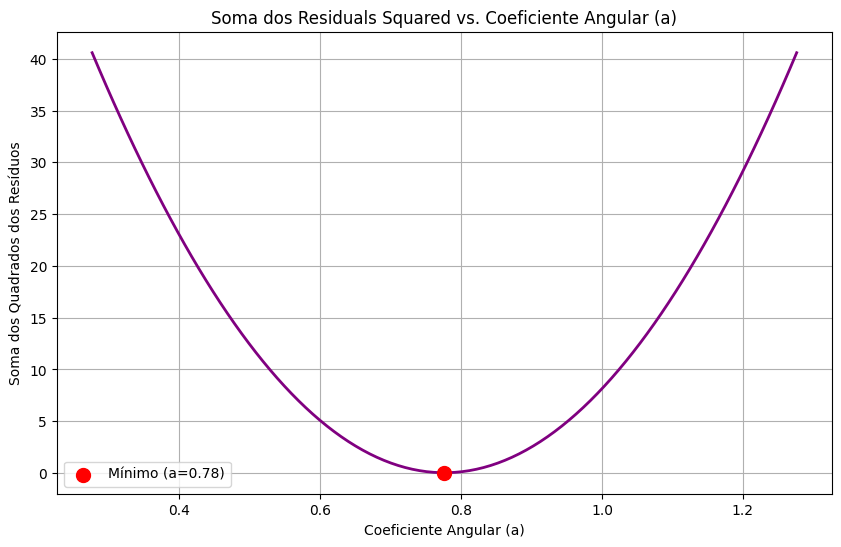

--------------------------------------------------


In [41]:
plt.figure(figsize=(10, 6))
plt.plot(slopes_for_ssr_plot, ssr_values, color='purple', linewidth=2)
plt.scatter(best_slope, np.sum((y_tamanho - (intercepto_sklearn + best_slope * X_peso))**2),
            color='red', s=100, zorder=5, label=f'Mínimo (a={best_slope:.2f})')
plt.title('Soma dos Residuals Squared vs. Coeficiente Angular (a)')
plt.xlabel('Coeficiente Angular (a)')
plt.ylabel('Soma dos Quadrados dos Resíduos')
plt.grid(True)
plt.legend()
plt.show()
print("-" * 50)

![imagem da questao](../../assets/Captura%20de%20Tela%202025-05-23%20às%2017.42.16.png)

![imagem da questao](../../assets/Captura%20de%20Tela%202025-05-23%20às%2021.04.44.png)

# R-squared: 0.9984
Indica que 99.8% da variabilidade no tamanho do mouse é explicada pelo peso do mouse através do seu modelo de regressão linear. Em termos práticos, é um ajuste quase perfeito dos dados à linha de regressão.

# Adjusted R-squared: 0.9982
Versão ajustada do R-squared que penaliza a inclusão de variáveis preditoras que não melhoram significativamente o modelo. Em modelos com poucas variáveis (como este, com apenas uma), o Adjusted R-squared é muito próximo do R-squared. Seu valor muito alto apenas reforça a excelente capacidade explicativa do modelo.

# F-statistic: 5639.04
Esse vvalor é extremamente alto. Valores altos de F-statistic sugerem que a variância explicada pelo modelo é significativamente maior do que a variância não explicada, indicando que o modelo é, de fato, útil.

# Prob (F-statistic): 6.66e-14
é o p-value associado ao F-statistic. Ele indica a probabilidade de observar um F-statistic tão extremo (ou mais extremo) se a hipótese nula (de que todas as variáveis independentes não têm efeito) fosse verdadeira. Como este p-value é muito menor do que qualquer nível de significância comumente usado (por exemplo, 0.05 ou 0.01), nós rejeitamos a hipótese nula. Isso significa que o modelo de regressão como um todo é estatisticamente altamente significativo. 

# P-values: 
Coeficiente 'const' (Intercepto): 0.1100, P-value: 0.022
Como o nível de significância é de 0.05, rejeitamos a hipótese nula para o intercepto. Isso significa que o intercepto (0.1100) é estatisticamente significativo e diferente de zero.

Coeficiente 'x1' (Peso do Mouse): 0.7764, P-value: 0.0000
é extremamente menor do que qualquer nível de significância (e.g., 0.05 ou 0.01), rejeitamos fortemente a hipótese nula para o coeficiente de x1. Isso significa que o Peso do Mouse (0.7764) é um preditor altamente estatisticamente significativo do Tamanho do Mouse.